**C**

Here, you run the heatbath algorithm.

**C1.**

Download  (cut-and-paste) the heatbath algorithm for the Ising model shown  below.  Familiarize yourself with how it works before going on. 

In [1]:
import random, math

L = 6
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N) \
                                    for i in range(N)}
nsteps = 100000* N
T = 2.0
beta = 1.0 / T
S = [random.choice([-1, 1]) for site in range(N)]
E = -0.5 * sum(S[k] * sum(S[nn] for nn in nbr[k]) \
                                for k in range(N))
Energies = []
for step in range(nsteps):
    k = random.randint(0, N - 1)
    Upsilon = random.uniform(0.0, 1.0)
    h = sum(S[nn] for nn in nbr[k])
    Sk_old = S[k]
    S[k] = -1
    if Upsilon < 1.0 / (1.0 + math.exp(-2.0 * beta * h)):
        S[k] = 1
    if S[k] != Sk_old:
        E -= 2.0 * h * S[k]
    Energies.append(E)
print('Mean energy per spin:', sum(Energies) / float(len(Energies) * N))

Mean energy per spin: -1.7434162345679012


- Greatly increase the number of iterations of the algorithm.  Run  it for L=6 and T = 2.0. Check that you recover the exact value for the  mean energy E/N=-1.7473.. (known from exact enumeration).

- Communicate the results obtained in four independent runs of the algorithm. Indicate your value of nsteps. 

At N = 36e5, the value of mean energy per spin: -1.743753148148148

**C2.**

Modify the heatbath algorithm so that it does TWO computations  in parallel, as discussed in Tutorial 8: one starting from the all plus  spin configuration, and one from the all minus configuration. The  algorithm should stop when the two configurations couple, that is, when  the number of sites where they differ becomes equal to zero.

**For simplicity, we provide this program**, you are free to download (cut-and-paste), run and modify it, but familiarize yourself thoroughly with it.
Now, modify this program by implementing a function which plots the two configurations  side by side, so that you can observe how they evolve towards the  coupling. The snippet for plotting the two configuration is given below

coupling time: 125.0


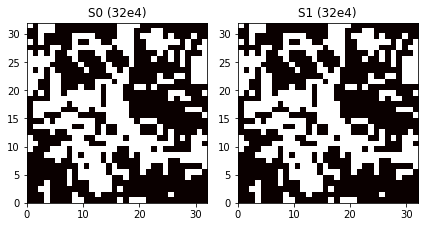

In [15]:
import random, math, pylab

def show_spins(S0, S1, L, label):
    pylab.set_cmap('hot')
    conf0 = [[0 for x in range(L)] for y in range(L)]
    conf1 = [[0 for x in range(L)] for y in range(L)]
    for k in range(N):
        y = k // L
        x = k - y * L
        conf0[x][y] = S0[k]
        conf1[x][y] = S1[k]
    pylab.subplot(1, 2, 1)
    pylab.imshow(conf0, extent=[0, L, 0, L], interpolation='nearest')
    pylab.title('S0 ' + label)
    pylab.subplot(1, 2, 2)
    pylab.imshow(conf1, extent=[0, L, 0, L], interpolation='nearest')
    pylab.title('S1 ' + label)
    pylab.tight_layout()
    pylab.savefig('plot_' + label + '.png')
    #pylab.close()
    pylab.show()

L = 32
N =  L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N) \
                                    for i in range(N)}
T = 3.0
beta = 1.0 / T
nsteps = N
S0 = [1] * N
S1 = [-1] * N
step = 0
steps = 0
while True:
    step += 1
    k = random.randint(0, N - 1)
    Upsilon = random.uniform(0.0, 1.0)
    h = sum(S0[nn] for nn in nbr[k])
    S0[k] = -1
    if Upsilon < 1.0 / (1.0 + math.exp(-2.0 * beta * h)):
        S0[k] = 1
    h = sum(S1[nn] for nn in nbr[k])
    S1[k] = -1
    if Upsilon < 1.0 / (1.0 + math.exp(-2.0 * beta * h)):
        S1[k] = 1
        #show_spins(S0, S1, L, '(32e4)')
    if step % N == 0:
        if steps % nsteps == 0:
            n_diff = sum(abs(S0[i] - S1[i]) for i in range(N))
            if n_diff == 0:
                t_coup = step / N
                print('coupling time:', t_coup) 
                break
show_spins(S0, S1, L, '(32e4)')

- **Implement this function in the program:** after the check of whether coupling took place (already in the program), you should call the show_spins(..) function, but only once every 10 sweeps (hint: use a condition like "if nsteps % XXX == 0", with the appropriate choice of XXX). Note that the input "label" should be a string which encodes at least the sweep number (and possibly also other informations, as the values of L and T).

- Run your program for L=32, at T=3.0. **Upload the first figure** you obtain (which is just after the few initial sweep)


**C2 (continued)**

- Upload the last figure (which is the last one obtained, before coupling takes place and the program ends).


**C2 (continued)**

- **Comment** on  these two figures, and the other intermediate figures (which you do not  need to upload). Can one notice that the two configurations evolve  towards coupling?